In [3]:
import numpy as np
import matplotlib.pyplot as plt
import re
import math

In [5]:
def get_loss_from_log(path, data):
    metadata_file = path + "\\" + data
    with open(metadata_file) as f:
        lines = f.readlines()

    Train_loss_list = []
    Valid_loss_list = []
    Lr_list = []

    for i in range(len(lines)):
        if "Train" in lines[i]:
            #Train_loss = int(re.findall(r'-?\d+', lines[i])[-2])
            Train_loss = float(lines[i][(lines[i].find("pts_loss")) + 9:])
            Train_loss_list.append(Train_loss)
        if "Valid" in lines[i]:
            Valid_loss = float(lines[i][17:])
            Valid_loss_list.append(Valid_loss)
        if "learning rate" in lines[i]:
            Lr = float(lines[i][26:])
            Lr_list.append(Lr)

    a, b = int(len(Train_loss_list) / len(Valid_loss_list)), int(len(Lr_list) / len(Valid_loss_list))
    Train_loss_list = Train_loss_list[a - 1::a]
    Lr_list = Lr_list[b - 1::b]
    
    return Train_loss_list, Valid_loss_list, Lr_list

In [19]:
def show_loss_Lr2(list1, list2, list3, list1_b, list2_b, list3_b, start=0):
    fig = plt.figure(figsize=(30, 20), dpi=80)
    ax1 = fig.add_subplot(111)
    # fig.ax1 = plt.subplots()

    ax1.ylim = max(list1) * 1.1
    ax1.xlim = len(list1) * 1.1

    ax2 = plt.twinx()
    # ax2.ylim = max(list3)*1.1
    # ax2.xlim = len(list1)*1.1

    ax1.set_ylabel("Loss", c="r", fontsize="30")
    ax1.set_xlabel("epoch", fontsize="20")
    ax2.set_ylabel("Learning Rate", c="g", fontsize="30")

    ax1.plot(list1[start:], label="train_loss with ADAM", c="r", marker=".")
    ax1.plot(list2[start:], label="valid_loss with ADAM", c="r", marker=".", alpha=0.3)

    ax1.plot(list1_b[start:], label="train_loss with ADAM & SGD", c="g", marker=".")
    ax1.plot(list2_b[start:], label="valid_loss with ADAM & SGD", c="g", marker=".", alpha=0.3)

    ax2.plot(list3[start:], label="learning rate ADAM", c="blue", marker=".")
    ax2.plot(list3_b[start:], label="learning rate ADAM & SGD", c="orange", marker=".")

    ax1.legend(loc="upper left", fontsize="20")
    ax2.legend(loc="upper right", fontsize="20")
    plt.title("Comparison ADAM & ADAM + SGD’" + "\n" +
              "from epoch {} to epoch {}".format(start,len(list1) - 1),fontsize="30")

    plt.show()


In [ ]:
list1,list2,list3 = get_loss_from_log("ADAM_lr_0_01_MSE","log_info_0_249.txt")

In [22]:
list1_b,list2_b,list3_b = get_loss_from_log("ADAM_lr_0_01_SGD_0_000001_M0_9_Nes_MSE","log_info_0_249.txt")

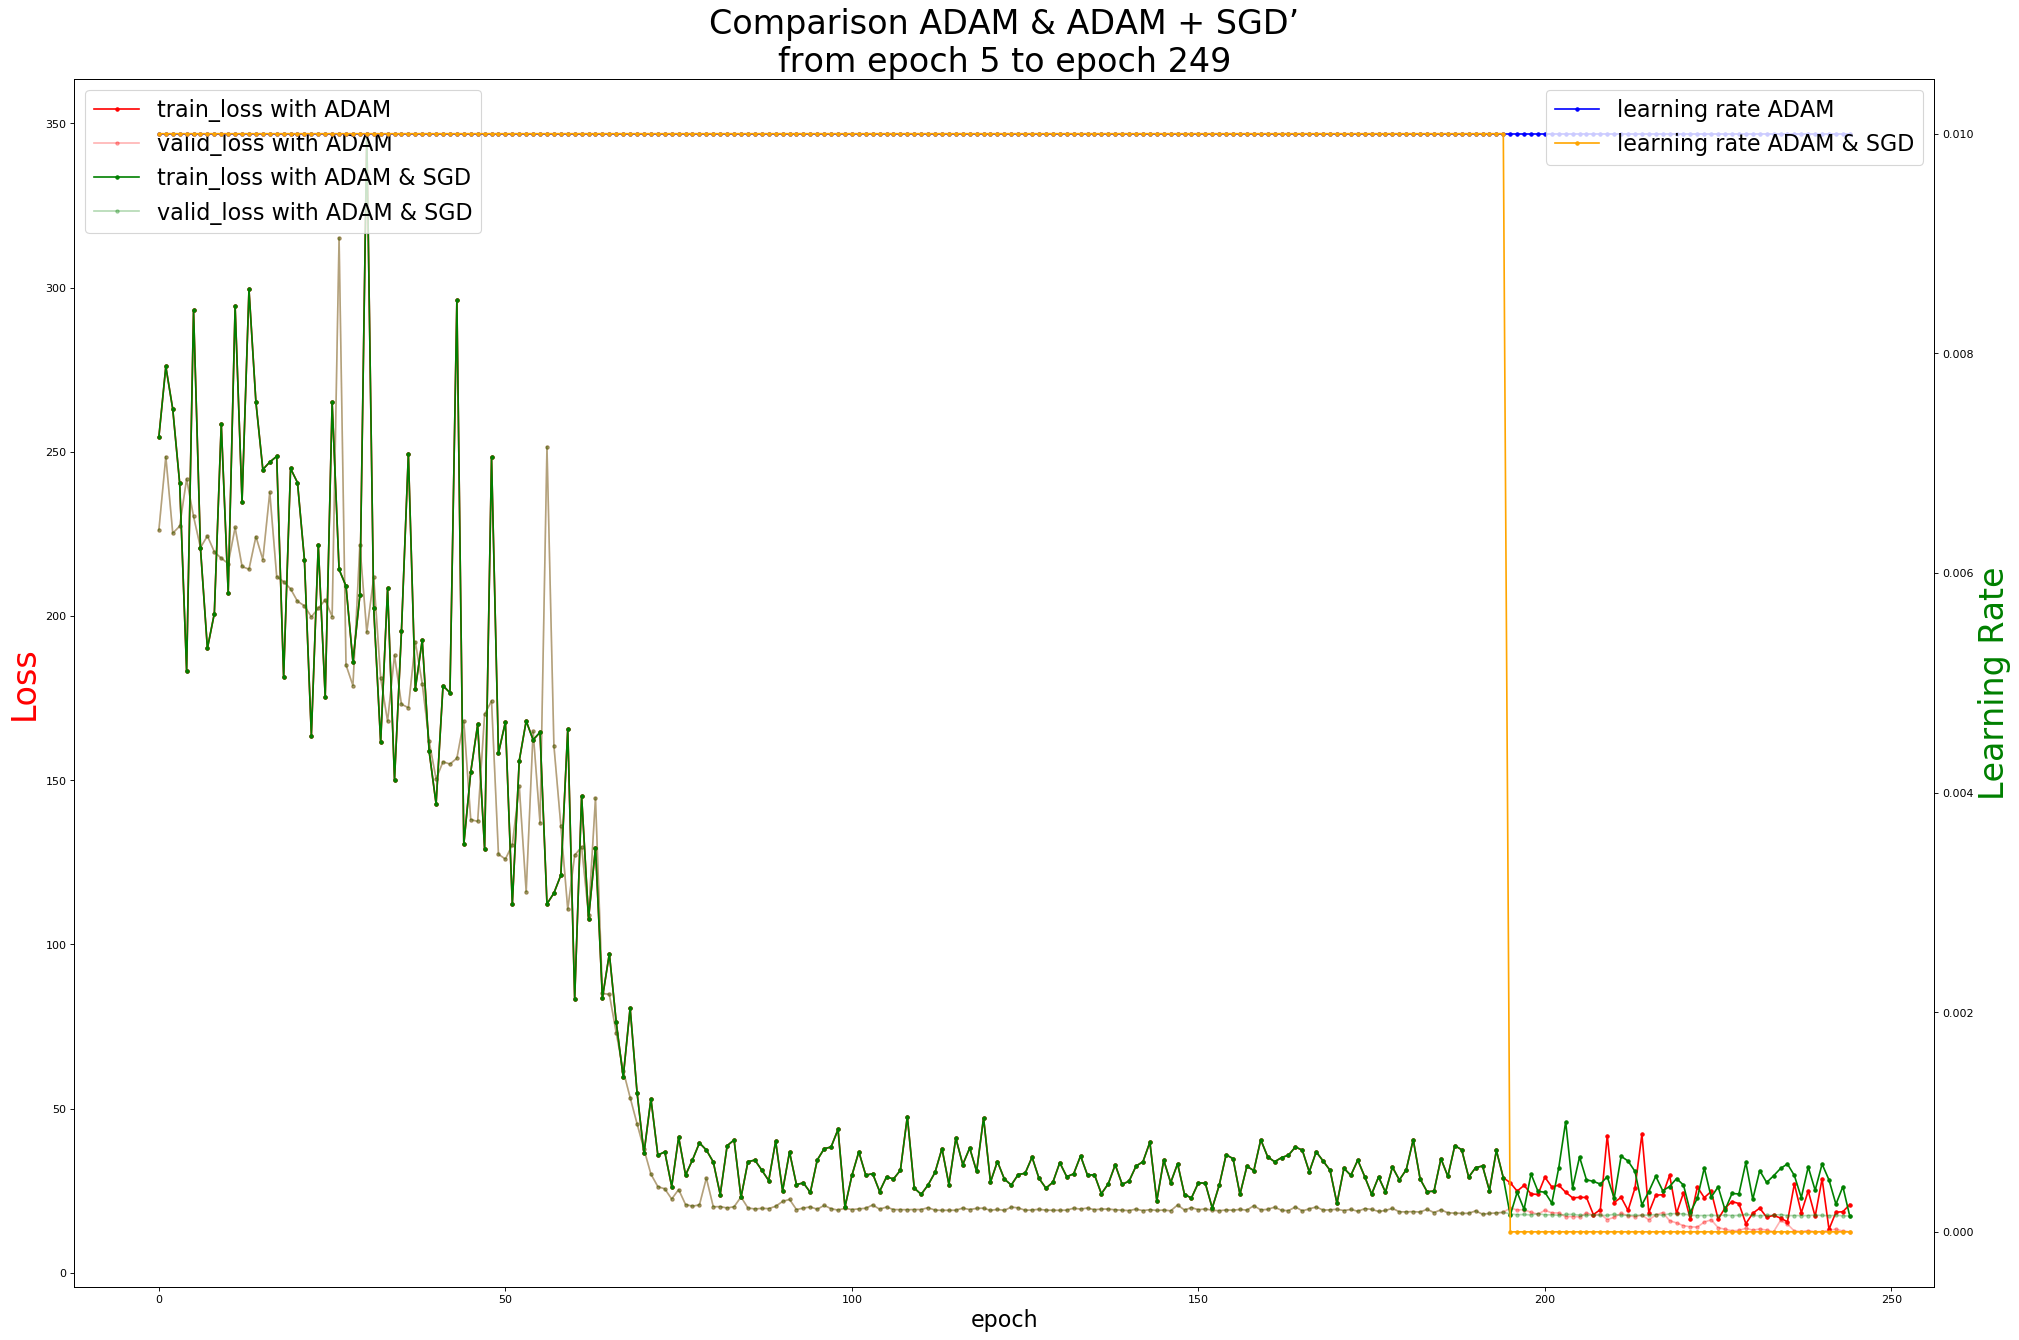

In [26]:
show_loss_Lr2(list1, list2, list3, list1_b, list2_b, list3_b, start=5)

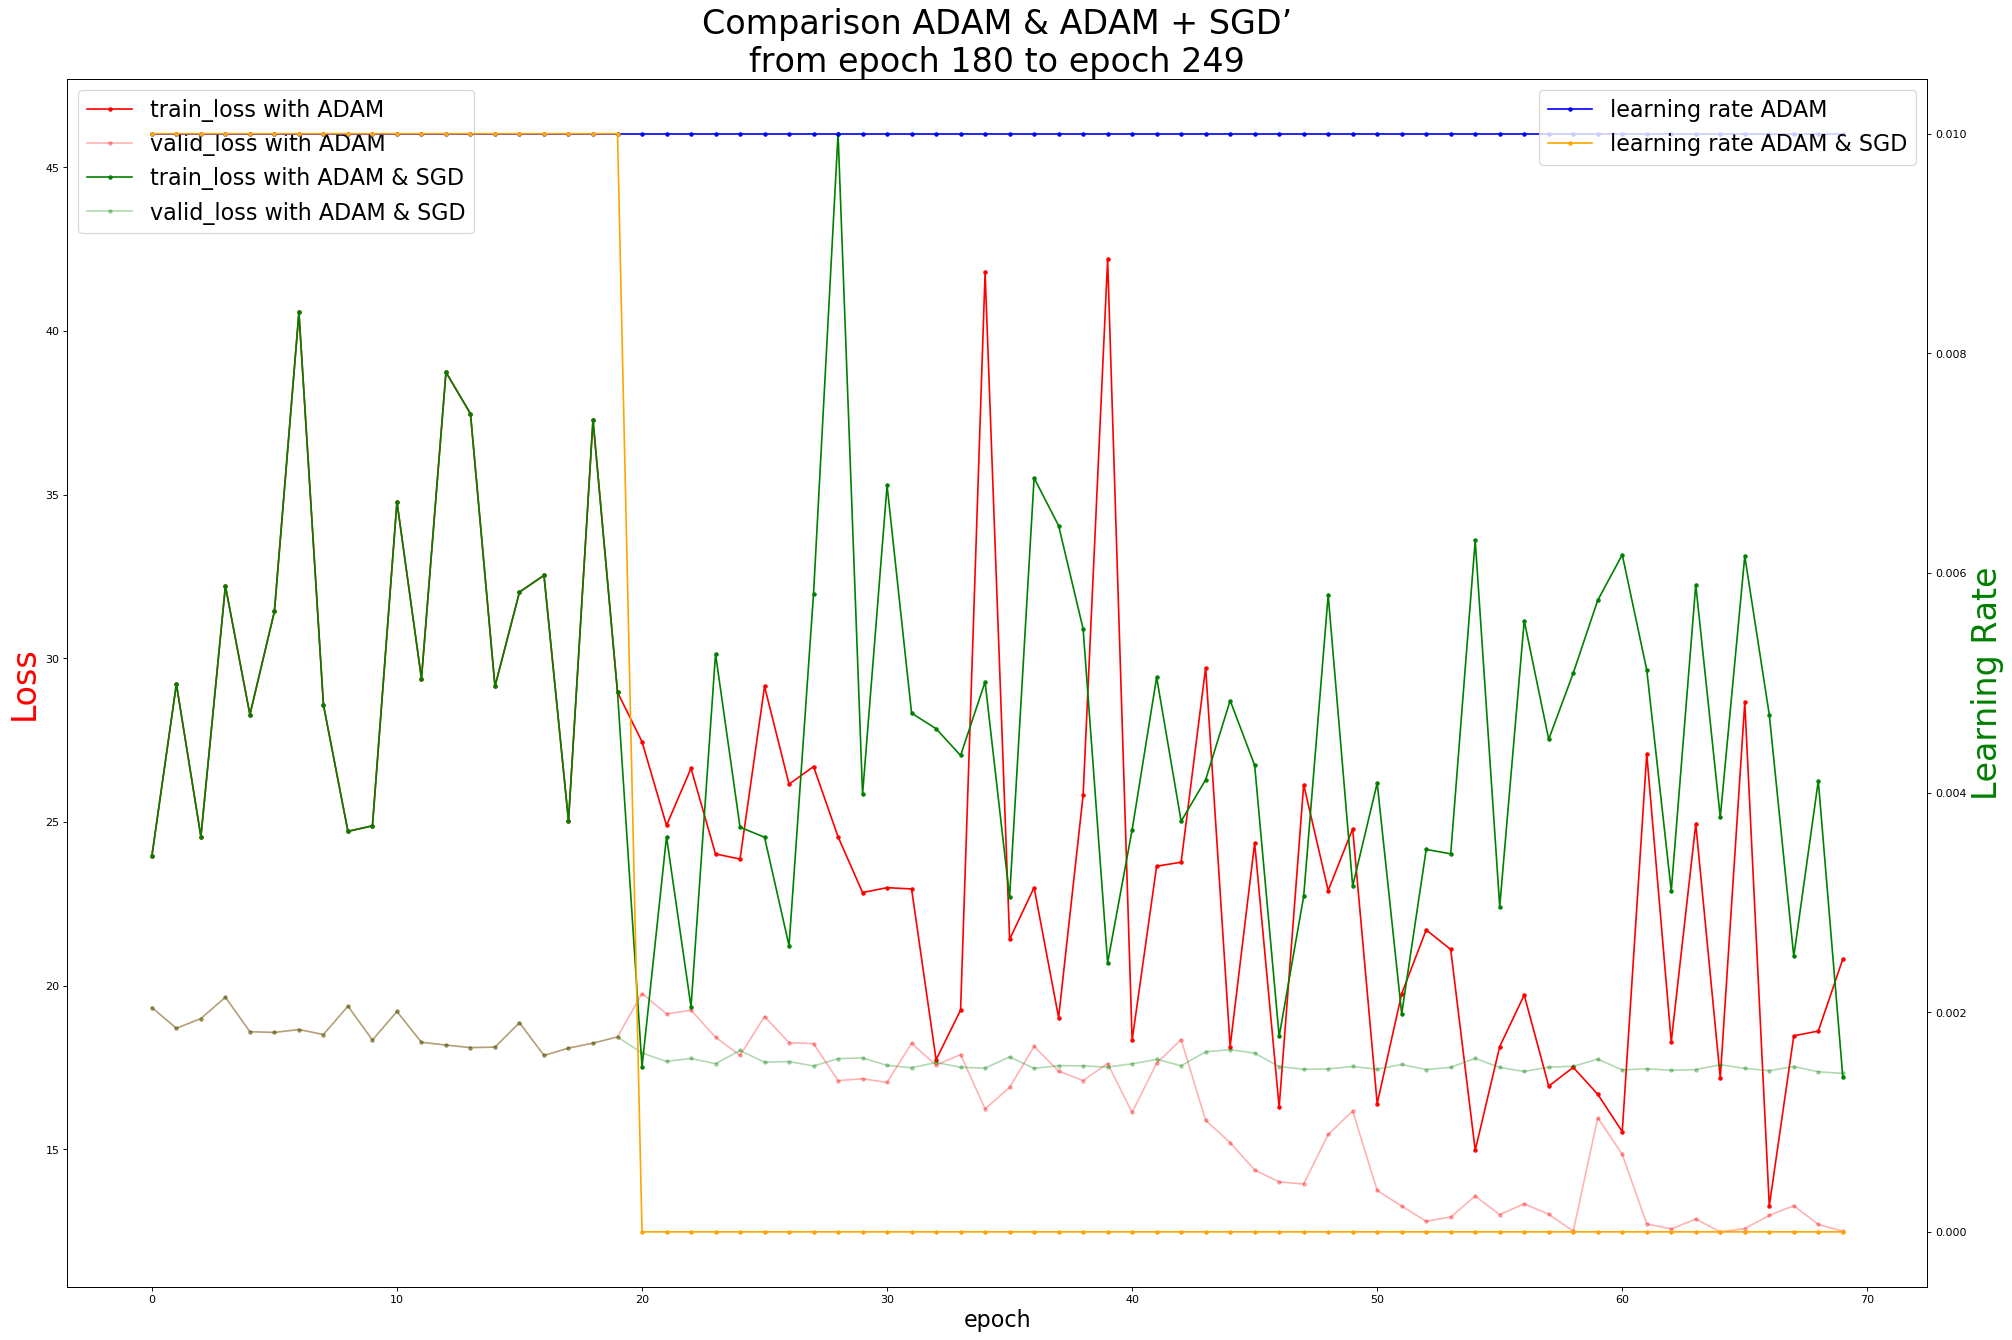

In [25]:
show_loss_Lr2(list1, list2, list3, list1_b, list2_b, list3_b, start=180)

In [14]:
def show_loss_Lr2(list1, list2, list3, list1_b, list2_b, list3_b, start=None):
    fig = plt.figure(figsize=(30, 20), dpi=80)
    ax1 = fig.add_subplot(111)
    # fig.ax1 = plt.subplots()

    ax1.ylim = max(list1) * 1.1
    ax1.xlim = len(list1) * 1.1

    ax2 = plt.twinx()
    # ax2.ylim = max(list3)*1.1
    # ax2.xlim = len(list1)*1.1

    ax1.set_ylabel("Loss", c="r", fontsize="30")
    ax1.set_xlabel("epoch", fontsize="20")
    ax2.set_ylabel("Learning Rate", c="g", fontsize="30")

    ax1.plot(list1[start:], label="train_loss with ADAM & fixed LR", c="r", marker=".")
    ax1.plot(list2[start:], label="valid_loss with ADAM & fixed LR", c="r", marker=".", alpha=0.3)

    ax1.plot(list1_b[start:], label="train_loss with ADAM & variable LR", c="g", marker=".")
    ax1.plot(list2_b[start:], label="valid_loss with ADAM & variable LR", c="g", marker=".", alpha=0.3)

    #ax1.plot(list1_bd[start:], label="train_loss with ADAM & BN & Dropout", c="b", marker=".")
    #ax1.plot(list2_bd[start:], label="valid_loss with ADAM & BN & Dropout", c="b", marker=".", alpha=0.3)

    ax2.plot(list3[start:], label="fixed LR", c="blue", marker=".")
    ax2.plot(list3_b[start:], label="variable LR", c="orange", marker=".")

    ax1.legend(loc="upper left", fontsize="20")
    ax2.legend(loc="upper right", fontsize="20")
    
    plt.title("Comparison fixed LR / variable LR" + "\n" +
              "from epoch {} to epoch {}".format(start,len(list1) - 1),fontsize="30")
    #plt.title("Comparison ADAM / ADAM + BN / ADAM + BN + Dropout" + "\n" +
              #"from epoch {} to epoch {}".format(start, len(list1) - 1), fontsize="30")

    plt.show()

In [7]:
list1,list2,list3 = get_loss_from_log("ADAM_lr_0_01_MSE","log_info_0_249.txt")

In [8]:
list1_b,list2_b,list3_b = get_loss_from_log("ADAM_variable_lr_0_01_MSE","log_info_0_249.txt")

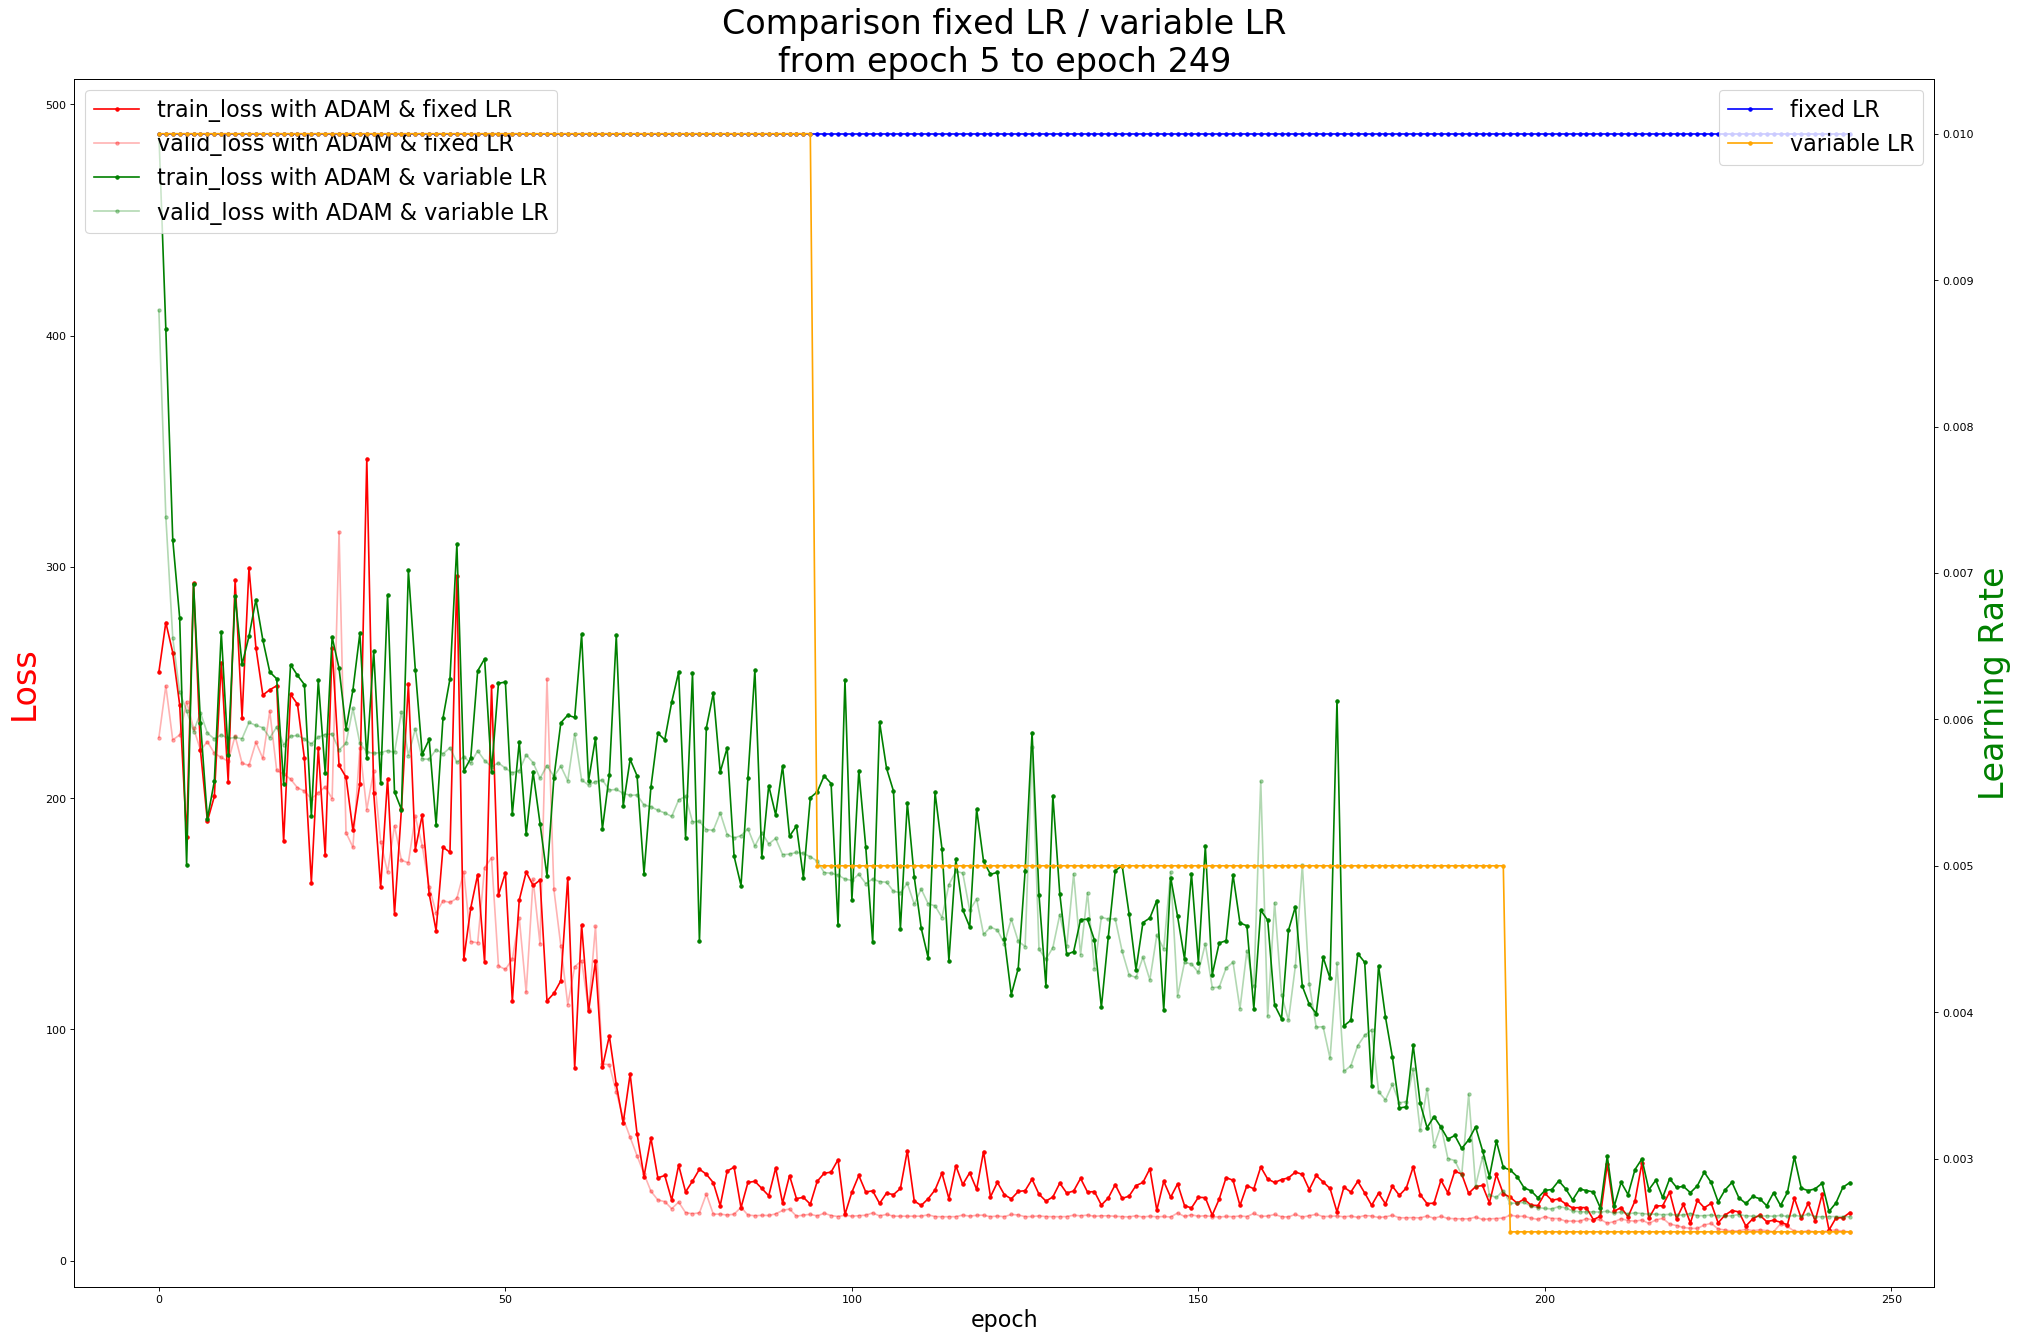

In [17]:
show_loss_Lr2(list1, list2, list3, list1_b, list2_b, list3_b, start=5)

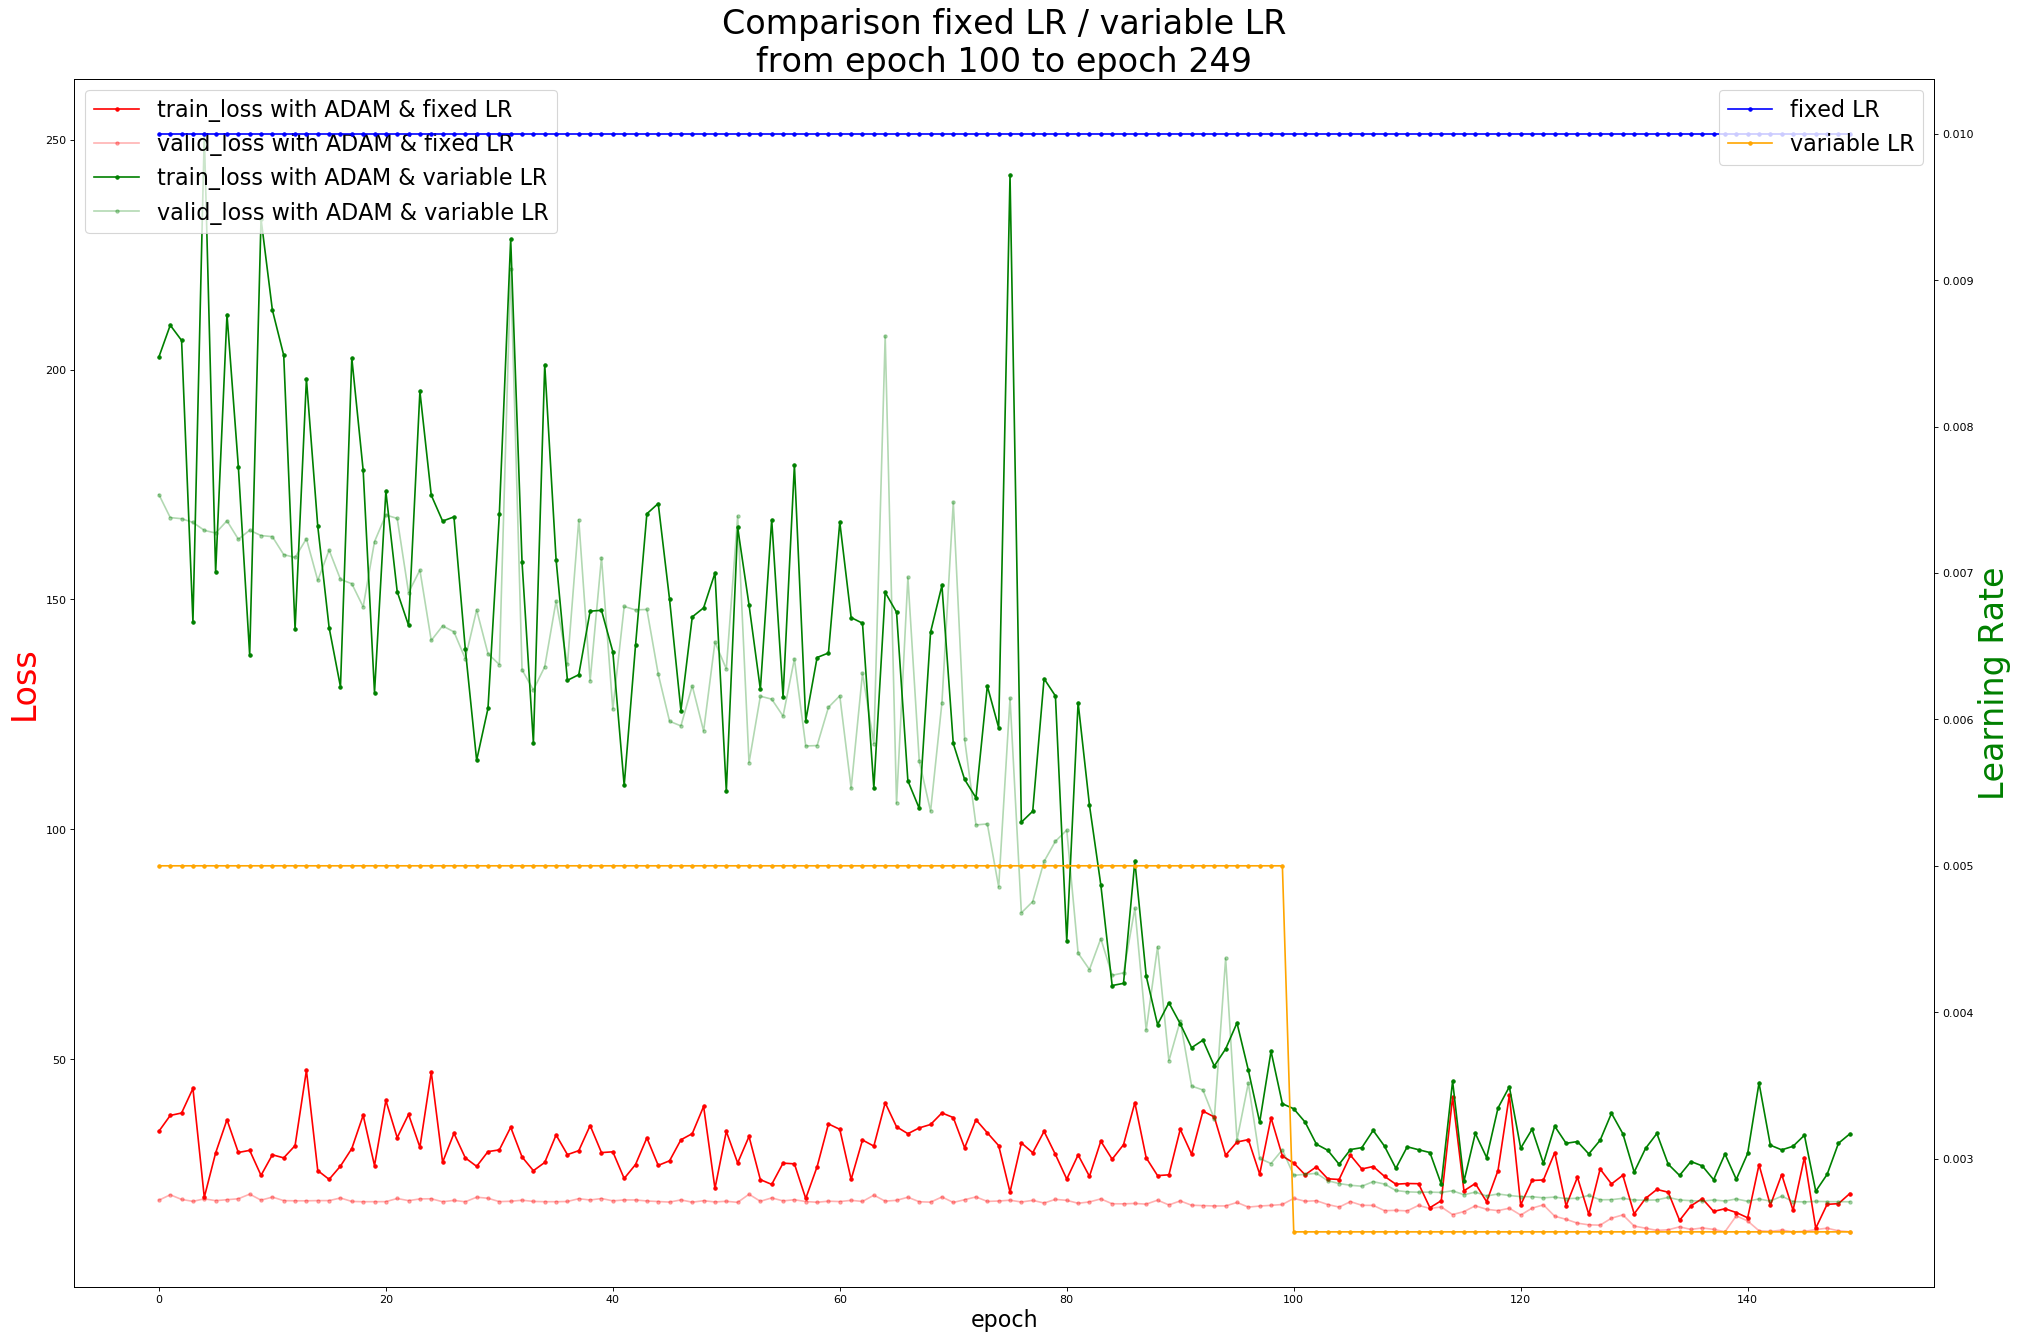

In [18]:
show_loss_Lr2(list1, list2, list3, list1_b, list2_b, list3_b, start=100)

In [33]:
def show_loss_Lr2(list1, list2, list3, list1_b, list2_b, list1_bd,list2_bd,start=0):
    fig = plt.figure(figsize=(30, 20), dpi=80)
    ax1 = fig.add_subplot(111)
    # fig.ax1 = plt.subplots()

    ax1.ylim = max(list1) * 1.1
    ax1.xlim = len(list1) * 1.1

    ax2 = plt.twinx()
    # ax2.ylim = max(list3)*1.1
    # ax2.xlim = len(list1)*1.1

    ax1.set_ylabel("Loss", c="r", fontsize="30")
    ax1.set_xlabel("epoch", fontsize="20")
    ax2.set_ylabel("Learning Rate", c="g", fontsize="30")

    ax1.plot(list1[start:], label="train_loss with ADAM", c="r", marker=".")
    ax1.plot(list2[start:], label="valid_loss with ADAM", c="r", marker=".", alpha=0.3)

    ax1.plot(list1_b[start:], label="train_loss with ADAM & BN", c="g", marker=".")
    ax1.plot(list2_b[start:], label="valid_loss with ADAM & BN", c="g", marker=".", alpha=0.3)

    ax1.plot(list1_bd[start:], label="train_loss with ADAM & BN & Dropout", c="b", marker=".")
    ax1.plot(list2_bd[start:], label="valid_loss with ADAM & BN & Dropout", c="b", marker=".", alpha=0.3)

    ax2.plot(list3[start:], label="learning rate ADAM", c="blue", marker=".")
    #ax2.plot(list3_b[start:], label="learning rate ADAM & SGD", c="orange", marker=".")

    ax1.legend(loc="upper left", fontsize="20")
    ax2.legend(loc="upper right", fontsize="20")
    #plt.title("Comparison MSE / Smooth L1" + "\n" +
              #"from epoch {} to epoch {}".format(start,len(list1) - 1),fontsize="30")
    plt.title("Comparison ADAM / ADAM + BN / ADAM + BN + Dropout" + "\n" + "from epoch {} to epoch {}".format(start, len(list1) - 1), fontsize="30")

    plt.show()

In [34]:
list1,list2,list3 = get_loss_from_log("ADAM_lr_0_01_MSE","log_info_0_249.txt")

In [35]:
list1_b,list2_b,list3_b = get_loss_from_log("ADAM_lr_0_01_BN_MSE","log_info_0_249.txt")

In [36]:
list1_bd,list2_bd,list3_bd = get_loss_from_log("ADAM_lr_0_01_BN_Dropout_MSE","log_info_0_249.txt")

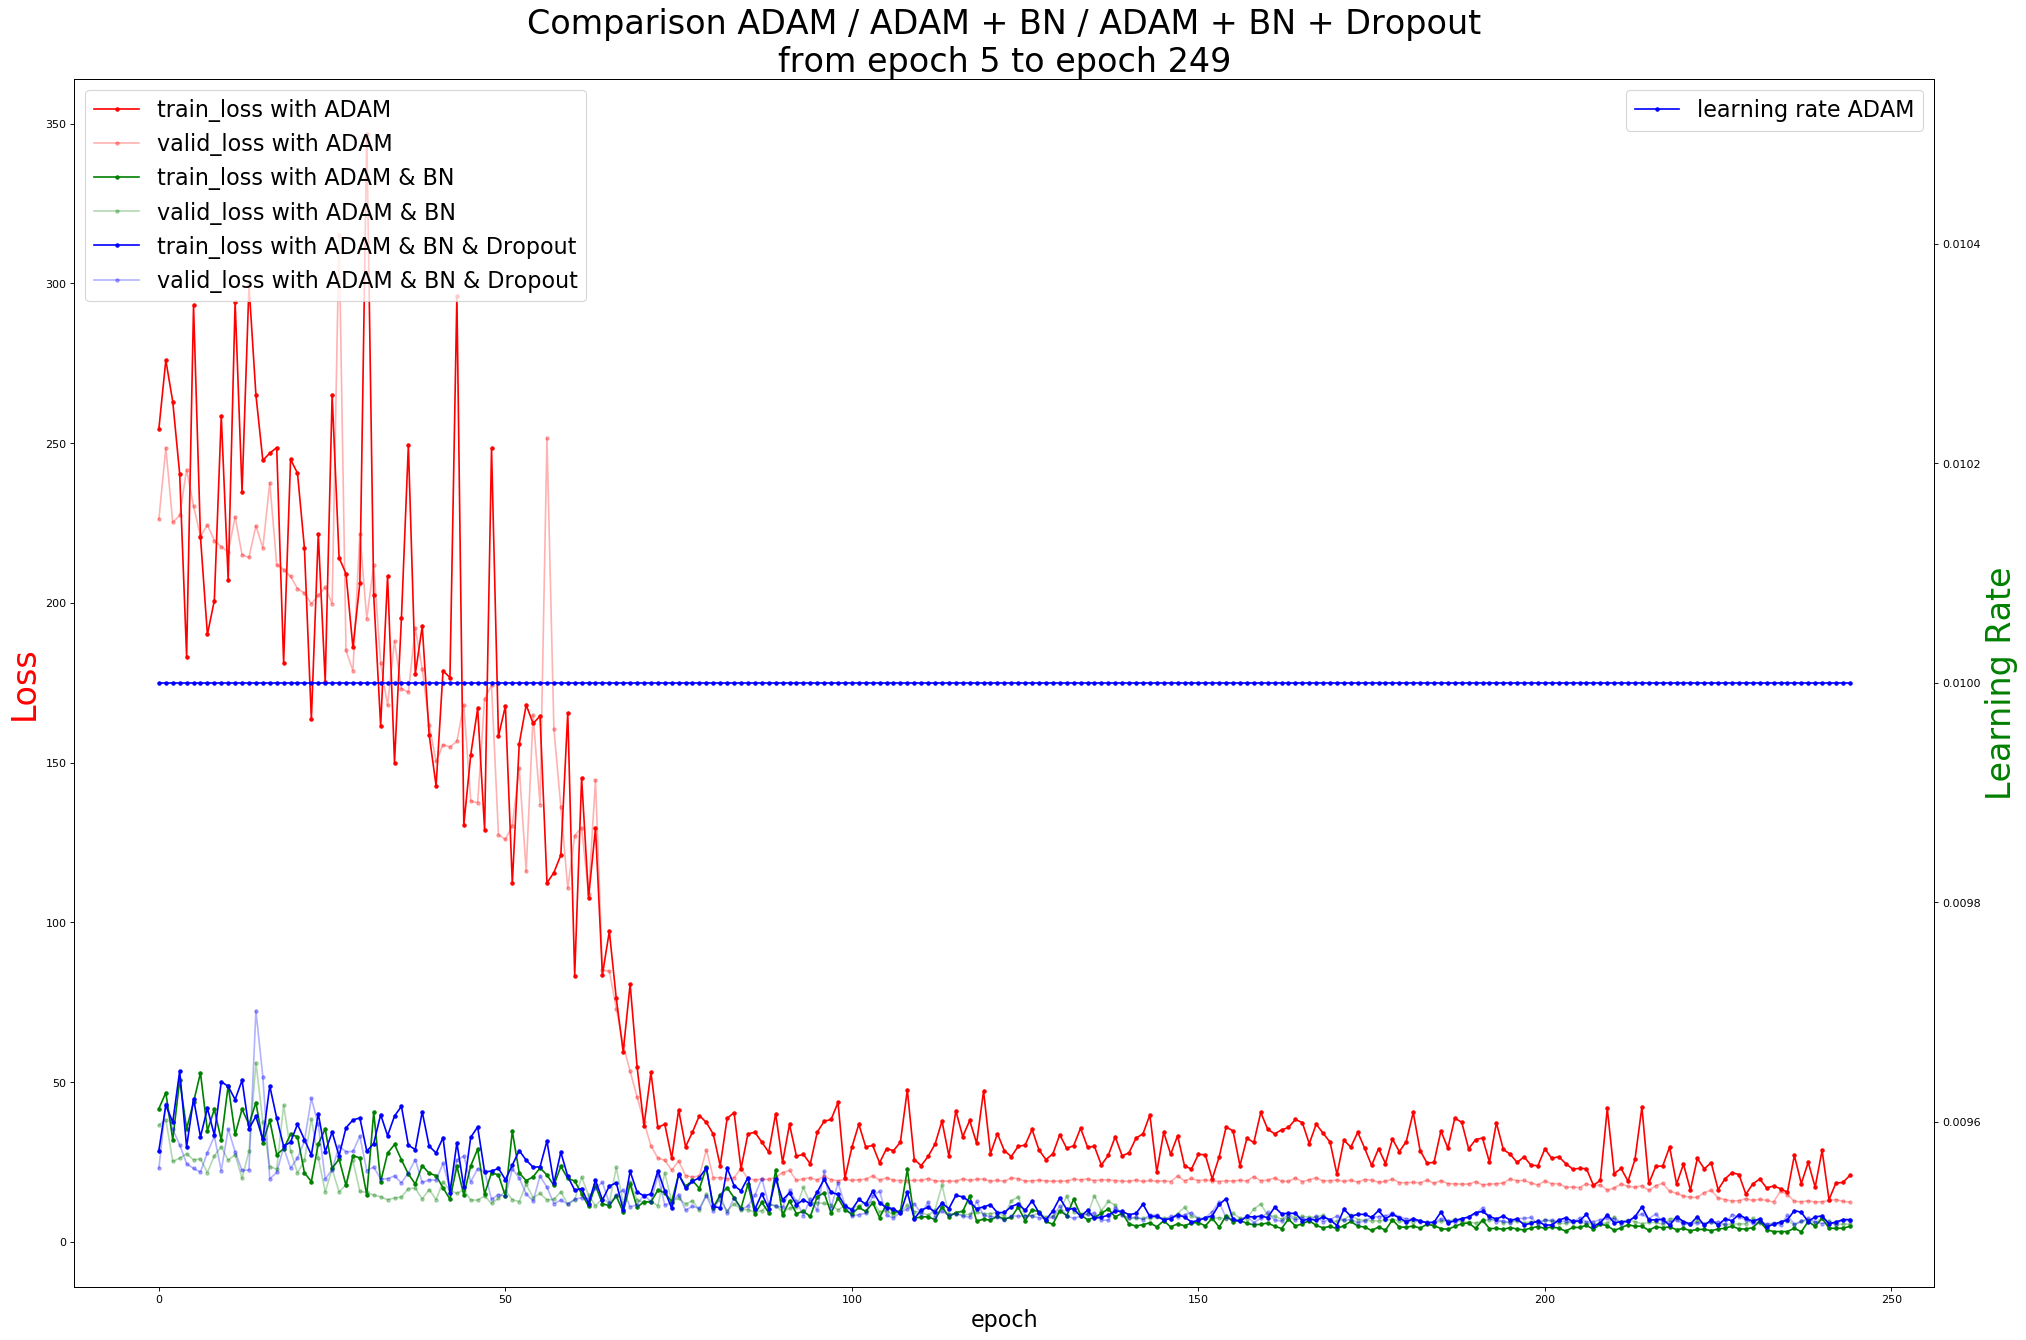

In [38]:
show_loss_Lr2(list1, list2, list3, list1_b, list2_b, list1_bd,list2_bd,start=5)

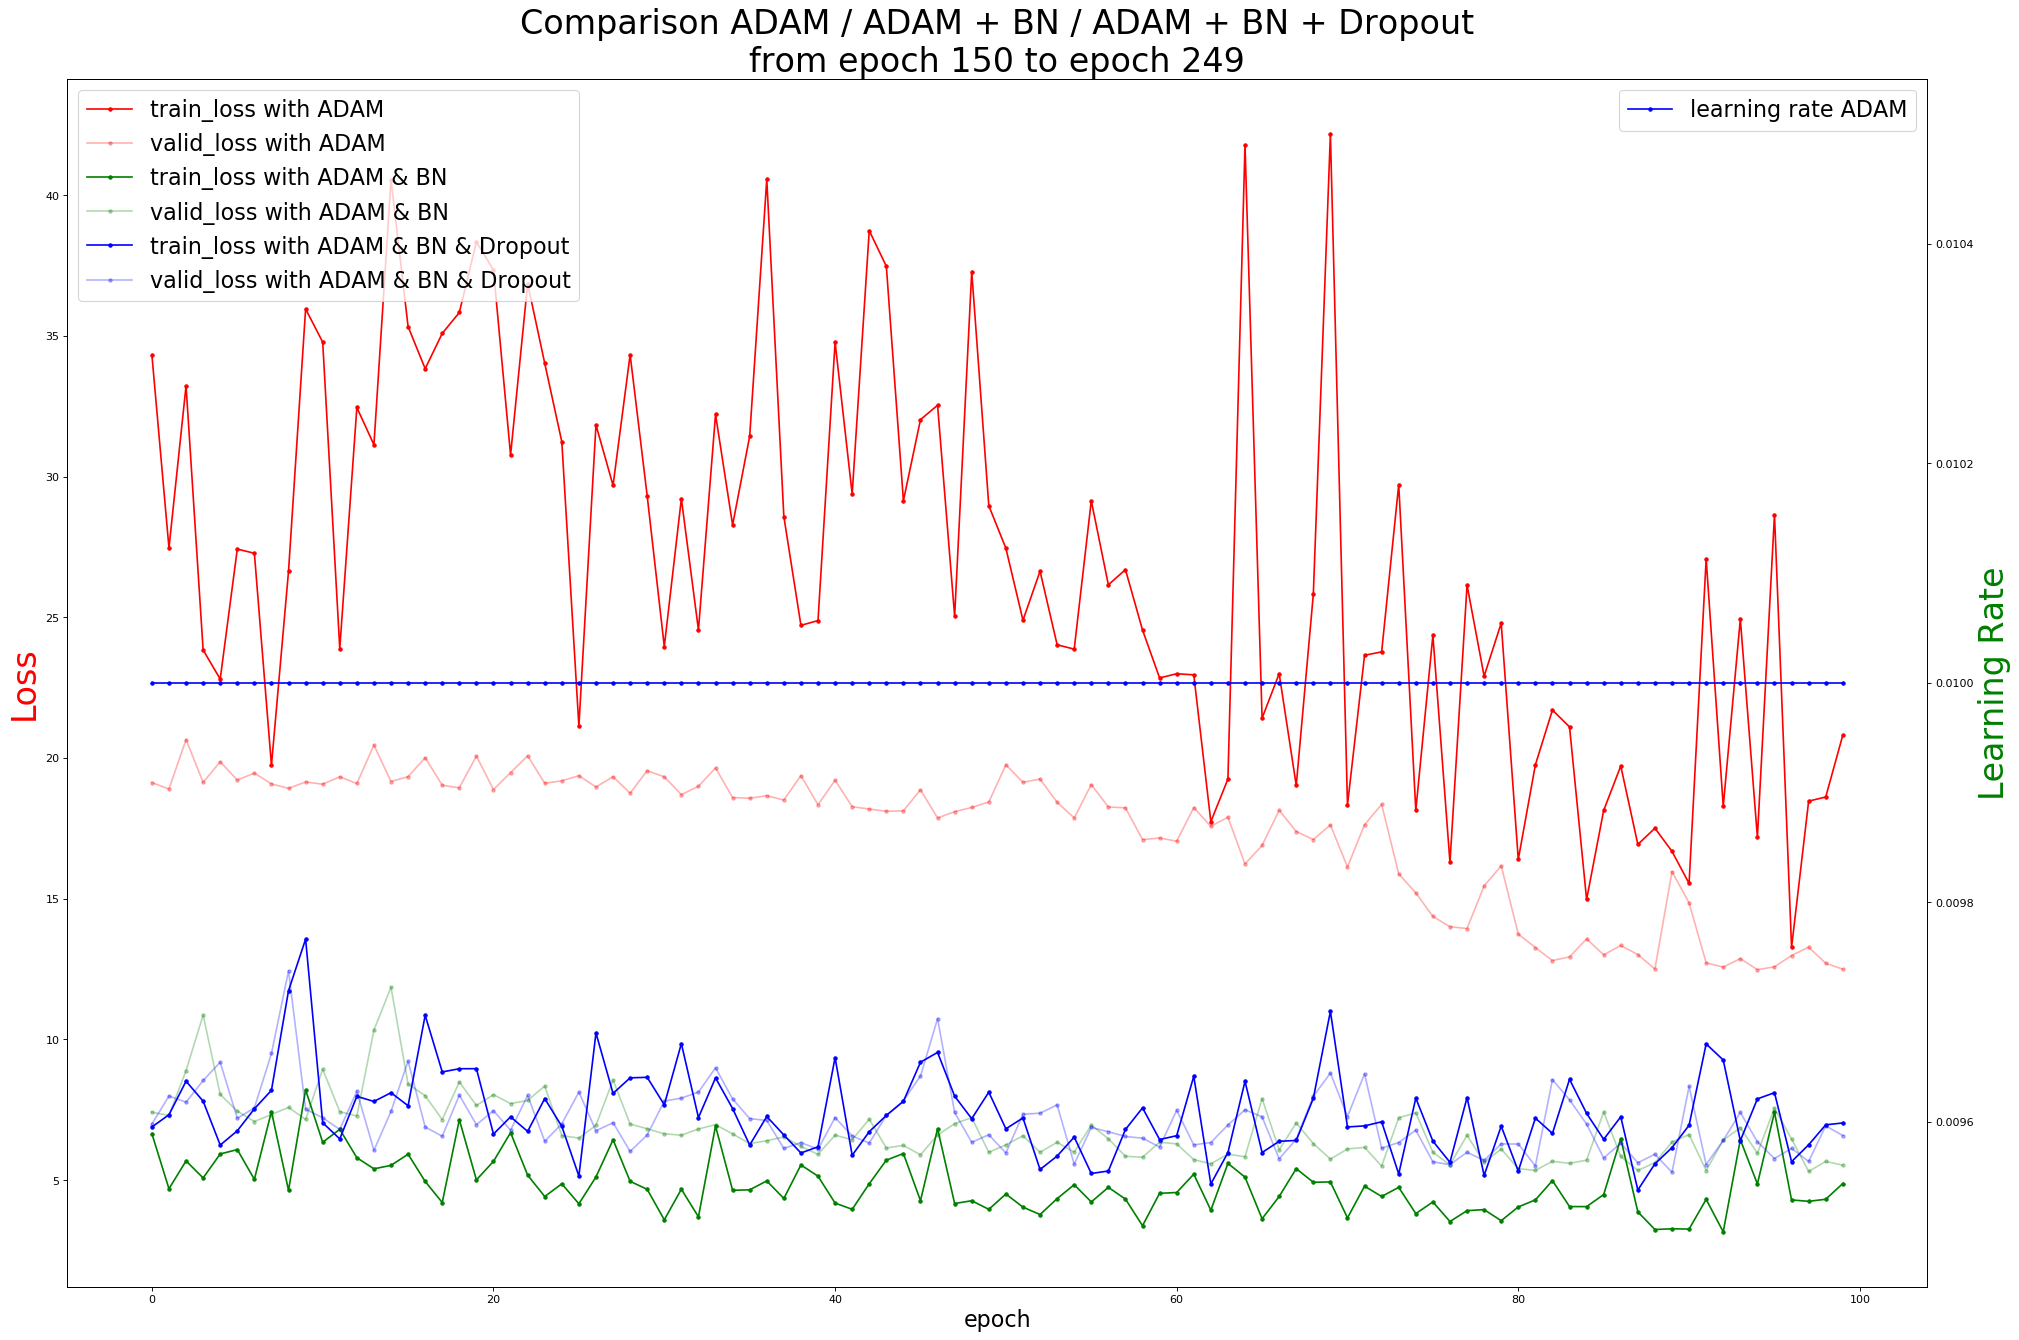

In [39]:
show_loss_Lr2(list1, list2, list3, list1_b, list2_b, list1_bd,list2_bd,start=150)